# Improved perceptron 

## Initial setup

After importing the libraries <tt>numpy</tt> and <tt>pyplot</tt>, before coding the improved algorithm it is important to set up the environment.

The first thing to do is to generate some __pseudo-random__ numbers. They are called that way because, given the seed (which, in this case, is 22), their generation is entirely deterministic. In such a way the simulation is replicable. Secondly, the number <tt>N</tt> of samples per class is defined (can be seen as the $N$ of the _Hoeffding's inequality_).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# pseudo-random number generator
np.random.seed(22)

# generate 10 points per class
N = 10

After that, the <tt>normal</tt> function is inked to generate the numbers in a Gaussian curve. The specified values stand for:

* <tt>loc</tt>, specifying the _mean_ value to $0.5$ (generally is $0$);

* <tt>scale</tt>, which is related to the _standard deviation_, set at $0.1$;

These two values make the bell curve very dense across the value $0.5$. This technique is used to generate 4 sets: the x-axis and y-axis of $X1$ and $X2$.

Particularly to generate $X2$ components, it is used the bell curve of $X1$ added to another Gaussian distribution.


In [2]:
# generates x-axis of X1 and X2
X1_1 = 2 * np.random.normal(loc = 0.5, scale = 0.1, size = N)

X2_1 = X1_1 + np.random.normal(loc = 0, scale = 0.15, size=N) + 0.1

# labels of the points 
Y1 = np.ones(N)


# generates x-axis of X1 and X2
X1_2 = 2 * np.random.normal(loc = 0.6, scale = 0.05, size = N)

X2_2 = X1_2 - np.random.normal(loc = 0.6, scale = 0.07, size = N)

# labels of the points 
Y2 = - np.ones(N)

After generating the sets containing the coordinates of the points, it is needed to plot them using the scatter</tt> function.

Secondly, the _weight_ vector $w = {w_0, \dots, w_n}$ is generated through the <tt>uniform</tt> function that generates a random set of 3 numbers with an uniform distribution between $[-1, 1]$.

Eventually, the final setup is displayed using the <tt>plot</tt> function.

[-0.60488298  0.5632455   0.21482773]


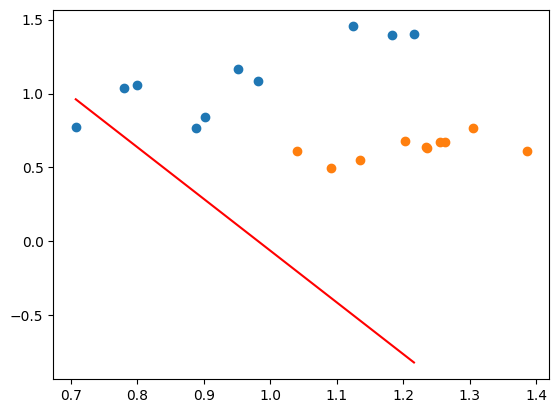

In [3]:
# plots the sets of points
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

# generates w = {w0, ..., wn}
w = np.random.uniform(low = -1, size = 3)
print(w)

# plots the initial setup
plt.plot([np.min(X1_1), np.max(X1_1)], # defines coordinates of the line
         [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_2) * (-w[1]/w[2]) - w[0]/w[2]], # defines y = mx + q
         color='red')

## Learning algorithm

To start the learning algorithm it is first necessary to create the actual vectors that are going to be used in the algorithm:

* $X_0$ is an array of all ones representing the _bias vector_;

* $X_1$ and $X_2$ contains the features of the dataset of the 1st and 2nd axis

* $X$ is the matrix containing the three previous vectors: each row is a datapoint while every column is a _feature_;

* $Y$ contains the label for the _classification_ task.

20


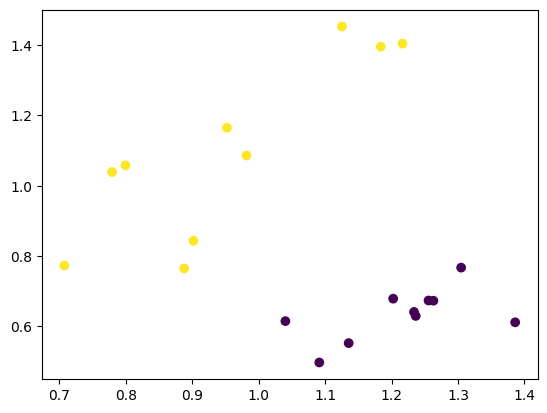

In [4]:
# bias vector
X0 = np.ones(N * 2)

# features of the dataset
X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

# feature matrix
X = np.stack((X0, X1, X2), axis=1)

# labels
Y = np.concatenate((Y1, Y2))

# plots the points
plt.scatter(X[:, 1], X[:, 2], c = Y)

# number of datapoints
print(Y.shape[0])

Now that the vectors and matrices are set up we can start the algorithm by initializing the variables <tt>w_init</tt>, <tt>num_errors</tt>, <tt>epochs</tt> (maximum number of iterations) and <tt>eta</tt>, indicating the greek letter $\eta \in ]0, 1]$, associated with the __learning rate__

In [5]:
w_init = w

# set checkpoint
num_errors = 0

# max number of iterations
epochs = 0

# learning rate
eta = 1e+0

When the loop starts the number of <tt>epochs</tt> is increased. After that, the algorithm loops through every entry inside $Y$ (in this case there are 20 entries). Inside the <tt>for</tt> loop the correction algorithm performs the same operation as the previous algorithm: it extracts the $i$-th point from the dataset and checks if the weight vector makes a good prediction (check between the sign of $y$ and $w\cdot x$). If the weight vector's prediction is wrong the following correction is made:

$$
w_{\text{new}} = w_{\text{old}} + \eta(x\,y)
$$

In [6]:
while True: # starts looping
    
    # increase epochs
    epochs += 1
    
    # loop through 
    for i in range(Y.shape[0]):
        # feature for index i
        x = X[i, :]

        # label for index i
        y = Y[i]
        
        # dot product between the weight vector and i-th point
        dot_prod = np.dot(w, x)
        
        # < 0 means that x and y are discordant
        if ((dot_prod * y) < 0):
            # new = old + eta(x * y)
            w = w + eta * (x * y)

            # increase errors
            num_errors += 1
    
    # stops only when there are no errors
    if (num_errors == 0):
        break
    else:
        num_errors = 0

After finishing the algorithm the only thing to do is display the values and plot the initial points with the solution found by the algorithm

Eta     1.0
Epochs: 27


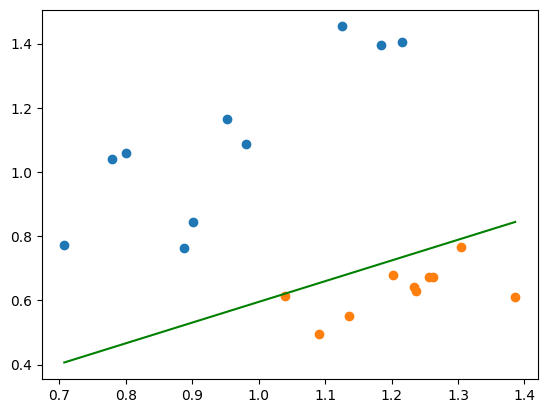

In [7]:
# plots the point
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

# prints the stats
print("Eta     " + str(eta))
print("Epochs: " + str(epochs))

# plots the solution
plt.plot([np.min(X1), np.max(X1)],
         [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]],
         color = 'green')